In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 6.2 MB/s 


In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Line style syntax importation.
%matplotlib inline

# Structuring the code.
import math, datetime, time, random

# Accessing, extracting, manipulating and modifying your observations.
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use("seaborn-whitegrid")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Importing train and test data.

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

# SibSp Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.SibSp.head()

0    1
1    1
2    0
3    1
4    0
Name: SibSp, dtype: int64

In [ ]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [ ]:
train.SibSp.dtypes

dtype('int64')

In [ ]:
train.SibSp.isnull().sum()

0

In [ ]:
train.SibSp.shape

(891,)

In [ ]:
train.SibSp.describe()

count    891.000000
mean       0.523008
std        1.102743
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        8.000000
Name: SibSp, dtype: float64

In [ ]:
train.groupby('SibSp').aggregate('count')

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare,Cabin,Embarked
SibSp,,,,,,,,,,,
0,608,608,608,608,608,471,608,608,608,126,606
1,209,209,209,209,209,183,209,209,209,69,209
2,28,28,28,28,28,25,28,28,28,6,28
3,16,16,16,16,16,12,16,16,16,3,16
4,18,18,18,18,18,18,18,18,18,0,18
5,5,5,5,5,5,5,5,5,5,0,5
8,7,7,7,7,7,0,7,7,7,0,7


In [ ]:
train.groupby('SibSp').aggregate('sum')

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
0,276865,210,1430,14788.25,113,15620.7530
1,91903,112,430,5506.42,137,9226.8004
2,11548,13,66,565.50,18,1449.1041
3,5145,4,41,167.00,21,1102.5418
4,6869,3,54,127.00,27,573.4000
5,1684,0,15,51.00,10,234.5000
8,3372,0,21,0.00,14,486.8500


In [ ]:
train.groupby('SibSp').aggregate('min')

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare
SibSp,,,,,,,,,
0,3,0,1,"Abbing, Mr. Anthony",female,0.42,0,110152,0.0000
1,1,0,1,"Abbott, Mr. Rossmore Edward",female,0.67,0,110413,6.4958
2,39,0,1,"Appleton, Mrs. Edward Dale (Charlotte Lamson)",female,0.75,0,11769,7.9250
3,8,0,1,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,2.00,0,19950,15.8500
4,17,0,3,"Andersson, Master. Sigvard Harald Elias",female,1.00,1,3101281,7.9250
5,60,0,3,"Goodwin, Master. Harold Victor",female,1.00,2,CA 2144,46.9000
8,160,0,3,"Sage, Master. Thomas Henry",female,NaN,2,CA. 2343,69.5500


In [ ]:
train.groupby('SibSp').aggregate('max')

,PassengerId,Survived,Pclass,Name,Sex,Age,Parch,Ticket,Fare
SibSp,,,,,,,,,
0,891,1,3,"van Melkebeke, Mr. Philemon",male,80.0,5,WE/P 5735,512.3292
1,889,1,3,"del Carlo, Mr. Sebastiano",male,70.0,6,WE/P 5735,263.0000
2,861,1,3,"Vander Planke, Mr. Leo Edmondus",male,53.0,3,W./C. 6608,262.3750
3,820,1,3,"Skoog, Miss. Margit Elizabeth",male,33.0,2,4133,263.0000
4,851,1,3,"Rice, Master. George Hugh",male,17.0,2,382652,39.6875
5,684,0,3,"Goodwin, Mr. Charles Edward",male,16.0,2,CA 2144,46.9000
8,864,0,3,"Sage, Mr. George John Jr",male,NaN,2,CA. 2343,69.5500


In [ ]:
train.groupby('SibSp').aggregate('std')

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
0,255.992322,0.475888,0.824539,13.647767,0.585377,49.733052
1,255.953585,0.499908,0.858529,14.645033,1.049716,40.380919
2,231.778699,0.507875,0.780042,14.679230,0.869835,66.225403
3,274.489094,0.447214,0.813941,11.317391,0.704154,96.355121
4,298.283351,0.383482,0.000000,4.880601,0.514496,7.322546
5,269.536083,0.000000,0.000000,5.805170,0.000000,0.000000
8,334.963537,0.000000,0.000000,NaN,0.000000,0.000000


In [ ]:
train.groupby('SibSp').aggregate('mean')

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
0,455.370066,0.345395,2.351974,31.397558,0.185855,25.692028
1,439.727273,0.535885,2.057416,30.089727,0.655502,44.147370
2,412.428571,0.464286,2.357143,22.620000,0.642857,51.753718
3,321.562500,0.250000,2.562500,13.916667,1.312500,68.908862
4,381.611111,0.166667,3.000000,7.055556,1.500000,31.855556
5,336.800000,0.000000,3.000000,10.200000,2.000000,46.900000
8,481.714286,0.000000,3.000000,NaN,2.000000,69.550000


In [ ]:
train.groupby('SibSp').aggregate('median')

,PassengerId,Survived,Pclass,Age,Parch,Fare
SibSp,,,,,,
0,461.5,0.0,3.0,29.0,0.0,9.5000
1,436.0,1.0,2.0,30.0,0.0,26.0000
2,437.5,0.0,3.0,23.0,0.0,23.7000
3,286.0,0.0,3.0,9.5,1.0,25.4667
4,264.5,0.0,3.0,6.5,1.5,31.2750
5,387.0,0.0,3.0,11.0,2.0,46.9000
8,325.0,0.0,3.0,NaN,2.0,69.5500


In [ ]:
train.SibSp.agg(['count', 'mean', 'std', 'sum', 'max', 'min'])

count    891.000000
mean       0.523008
std        1.102743
sum      466.000000
max        8.000000
min        0.000000
Name: SibSp, dtype: float64

In [ ]:
pd.pivot_table(train, index = 'Survived', columns = 'SibSp', values = 'Ticket' ,aggfunc ='count')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


In [ ]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.rcParams.update({'font.size': 15})

Text(0.5, 1.0, 'Evaluations of SibSp Distributions')

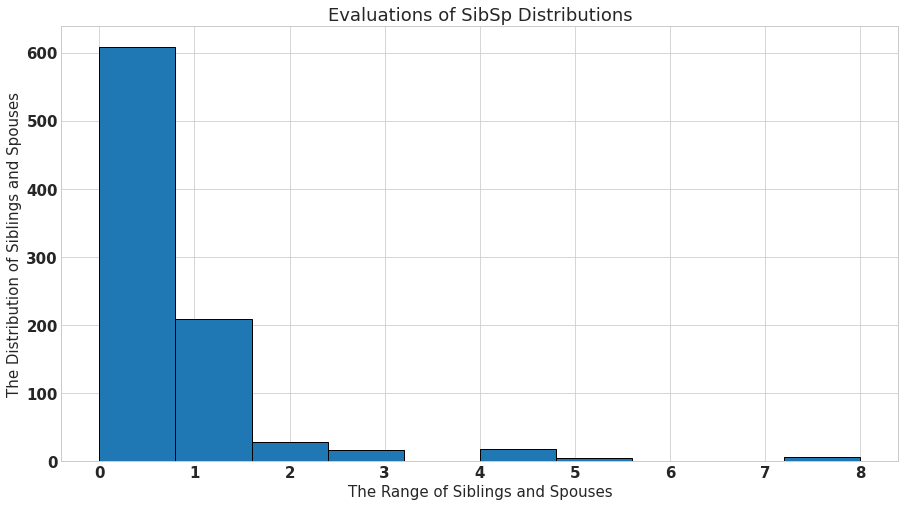

In [ ]:
train.SibSp.plot.hist(edgecolor = "black", figsize=(15,8))
plt.xlabel('The Range of Siblings and Spouses')
plt.ylabel('The Distribution of Siblings and Spouses')
plt.title('Evaluations of SibSp Distributions')

Text(0.5, 1.0, 'Evaluations of SibSp Distributions')

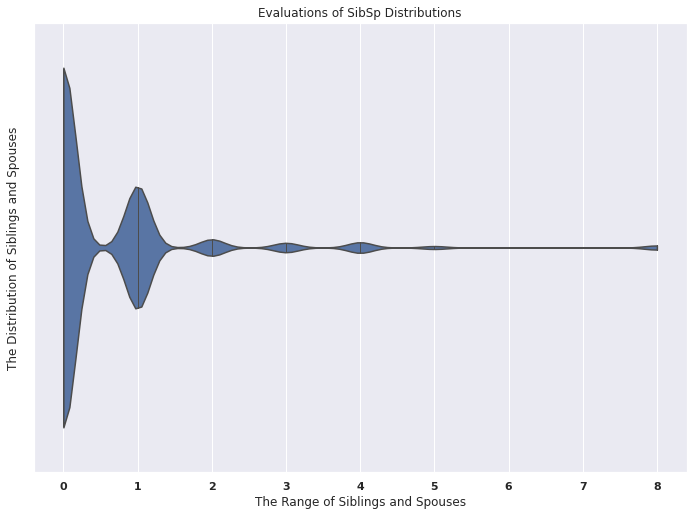

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x="SibSp", data=train, cut = 0, bw = .15, inner="stick", scale = "count")
plt.xlabel('The Range of Siblings and Spouses')
plt.ylabel('The Distribution of Siblings and Spouses')
plt.title('Evaluations of SibSp Distributions')

Text(0.5, 1.0, 'Evaluations of SibSp Distributions')

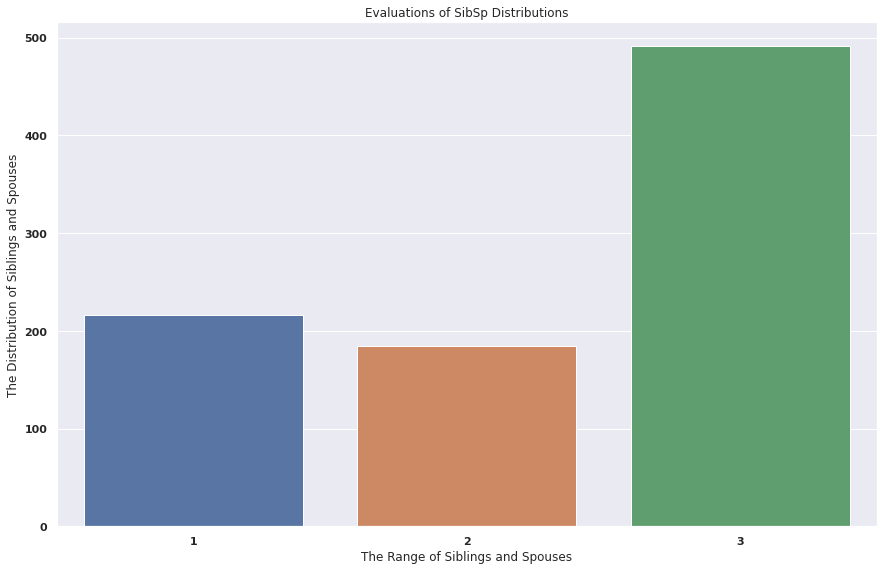

In [ ]:
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.countplot(x="Pclass", data=train)
plt.xlabel('The Range of Siblings and Spouses')
plt.ylabel('The Distribution of Siblings and Spouses')
plt.title('Evaluations of SibSp Distributions')

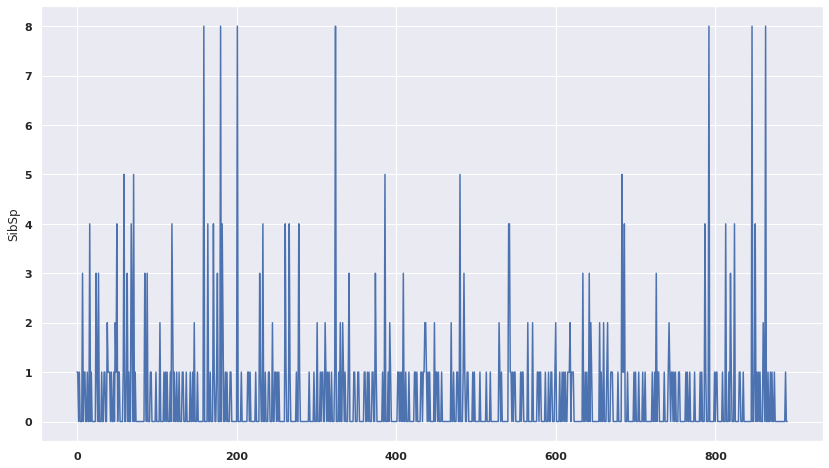

In [ ]:
sns.set_style('dark')
sns.set(rc={'figure.figsize':(14,8)})
sns.lineplot(data = train.SibSp)
plt.show()